# Gradient Descent

In this notebook we will implement the gradient descent algorithm which is used in neural network training. We will train a linear model in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First we define a linear function of the form y=ax which takes x-values and a set of parameters. In this example **a** is the only parameter of the model.

In [2]:
def f_linear(x, params={'a': 1}):
    """
    This is a linear function of form y=ax
    :param x: Input of the model
    :param params: Model parameters
    """
    return params['a'] * x

Next we create the x-values we run through our linear function and define the true parameters of the linear function and the parameters that the model is using.

In [3]:
# These are the x-values we feed into our linear function
X = np.linspace(0, 5, 100)

# These are the true parameters of our linear function and the model's parameters we want to optimize
true_params = {'a': 0.5}
model_params = {'a': 1.0}

We plot the true function (green) and the predicted function (orange) in one plot so that we can see how good the model predicts our true function.

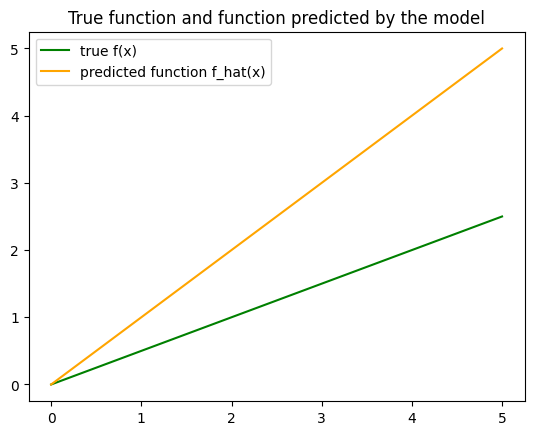

In [4]:
# Let's plot the true function and the function that is predicted by the model
fig, ax = plt.subplots(1, 1)
ax.plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax.plot(X, f_linear(X, model_params), color="orange", label="predicted function f_hat(x)")
ax.set_title("True function and function predicted by the model")
ax.legend()

We can see that the predicted y-values of our model are too large. This is because the value of the parameter **a** of the model is 1.0 while the true parameter's value is 0.5.

Next we define the MSE loss function which computes the difference (loss) between the true y-values and the y-values that are predicted by our model, also called "y hat" ($\hat{y}$).

For being able to perform the gradient descent step we also need to define the derivative of the MSE loss function with respect to the parameter a.

From a previous lecture we know that the derivative of the MSE loss function with respect to the parameter **a** is defined as:

$$ \frac{\partial L}{\partial a} = 2 \cdot (y - ax) \cdot (-x) $$

In [5]:
def mse_loss(x, y, params={'a': 1}):
    """
    This is a MSE loss function of form L=(y-y_hat)^2=(y-ax)^2
    :param x: Input of the model
    :param y: True y-values
    :param params: Model parameters
    """
    return (y - params['a'] * x)**2

def delta_mse_loss_a(x, y, params={'a': 1}):
    """
    This is the derivative of the MSE loss function with respect to the parameter a
    :param x: Input of the model
    :param y: True y-values
    :param params: Model parameters
    """
    return 2 * (y - params['a'] * x) * (-x)

We run the x-values through the true linear function and through our linear model and compare the y-values of both functions. We can see that the y-values of the model are double the values of the true linear function.

In [6]:
# Compare true y-values to predicted y-values
Y = f_linear(X, true_params)
Y_hat = f_linear(X, model_params)

print("True y values:", Y[0:3], "\nPredicted y values:", Y_hat[0:3])

True y values: [0.         0.02525253 0.05050505] 
Predicted y values: [0.         0.05050505 0.1010101 ]


Now let's compute the MSE loss.

In [7]:
mse_loss(X, Y, model_params).mean()

2.093855218855219

For optimizing the value of the parameter **a** we need to compute the derivative of the MSE loss function with respect to the parameter a: $\frac{\partial L}{\partial a}$.

In [8]:
delta_a = delta_mse_loss_a(X, Y, model_params).mean()
print("Derivative of the MSE loss function with respect to the parameter a:", delta_a)

Derivative of the MSE loss function with respect to the parameter a: 8.375420875420875


Now we have computed the gradient of the MSE loss function. $\frac{\partial L}{\partial a} = 8.375$.

We can now do the update step which is defined by the gradient descent algorithm. the new model parameter's value is the old value minus a learning rate's value times the gradient.

$$ a_{new} = a_{old} - \alpha \cdot \frac{\partial L}{\partial a} $$

The learning rate is a hyperparameter of our choice. We will see the effect of the learning rate on the training results later.

In [9]:
def gradient_descent(X, Y, old_params, alpha):
    """
    This function implements the gradient descent algorithm and returns the updated parameters
    :param X: the x-values
    :param Y: the true y-values
    :param old_params: The old model parameters
    :param alpha: The learning rate
    """
    params = {
        'a': old_params['a'] - alpha * delta_mse_loss_a(X, Y, old_params).mean()
    }
    return params

Next we perform the gradient descent step with the function we have defined in the last cell. The results are the updated parameters.

In [10]:
# Perform the gradient descent step to update the model parameters
new_model_params = gradient_descent(X, Y, old_params=model_params, alpha=0.05)

print("These are the new model parameters:", new_model_params)

These are the new model parameters: {'a': 0.5812289562289562}


The new value for our parameter **a** is 0.58, which is much better than the previous value 1.0. It has become closer to the true value 0.5.

To demonstrate this effect we will plot the true and the predicted function before and after performing the gradient descent step.

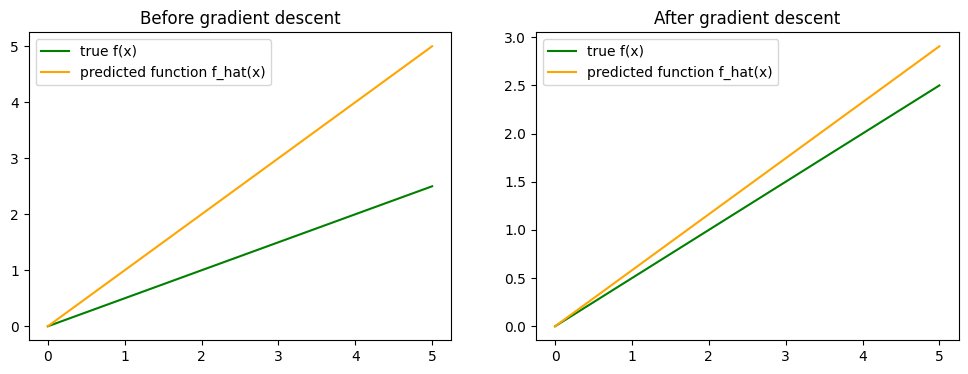

In [11]:
# Let's plot the true function and the function that is predicted by the model
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Plot true function and modelled function with old parameters
ax[0].plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax[0].plot(X, f_linear(X, model_params), color="orange", label="predicted function f_hat(x)")
ax[0].set_title("Before gradient descent")
ax[0].legend()

# Plot true function and modelled function with new parameters
ax[1].plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax[1].plot(X, f_linear(X, new_model_params), color="orange", label="predicted function f_hat(x)")
ax[1].set_title("After gradient descent")
ax[1].legend()

**Your task**

Change the value of the learning rate alpha and see what influence this has on the prediction of the model with the updated parameters.

## Training Loop

When training models with gradient descent we perform the gradient descent step multiple times. An iteration is often called an **epoch**. We will implement a simple training loop to find good parameters for our model. For every epoch we will print the loss value for the current parameters and the parameters themselves.

In [12]:
epochs = 10
alpha = 0.1

# These are the true funciton parameters
true_params = {'a': 0.5}

# These are the parameters of our model
initial_model_params = {'a': 1.0}
model_params = initial_model_params

# History of the parameters
history = []

# The true y-values do not change, we only have to compute them once
Y = f_linear(X, true_params)

# Train the model for multiple epochs
for epoch in range(epochs):
    # First run the x-values through our model to get the predictions
    Y_hat = f_linear(X, model_params)

    # Compute the MSE loss for the model's output
    loss = mse_loss(X, Y, model_params).mean()

    # Update the model parameters by performing the gradient descent step
    model_params = gradient_descent(X, Y, old_params=model_params, alpha=alpha)

    # Update history
    history.append({'loss': loss, 'param_a': model_params['a']})

    # Print some training information to the console
    print(f"Epoch {epoch}: loss={loss}, model_params={model_params}")

Epoch 0: loss=2.093855218855219, model_params={'a': 0.1624579124579124}
Epoch 1: loss=0.9542507370198566, model_params={'a': 0.7278693217245406}
Epoch 2: loss=0.4348889363997151, model_params={'a': 0.34616902691659795}
Epoch 3: loss=0.19819569392582012, model_params={'a': 0.6038488555664044}
Epoch 4: loss=0.09032543668720264, model_params={'a': 0.42989328100651825}
Epoch 5: loss=0.041164791984771555, model_params={'a': 0.5473279365595727}
Epoch 6: loss=0.018760386457003383, model_params={'a': 0.4680496589892447}
Epoch 7: loss=0.008549833074495227, model_params={'a': 0.5215691696049038}
Epoch 8: loss=0.0038964893270865535, model_params={'a': 0.4854389949300228}
Epoch 9: loss=0.001775780760140256, model_params={'a': 0.5098299040960621}


The loss has decreased a lot during training, which means the difference between our predicted y-values and the true y-values has become smaller. Let's plot the evolution of the loss and the parameter value during training.

Text(0, 0.5, 'Parameter a')

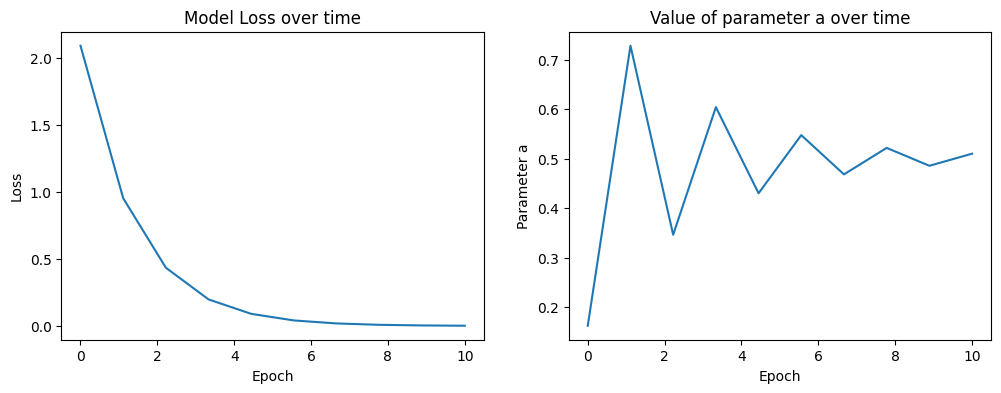

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# Plot the loss over time
ax[0].plot(np.linspace(0, epochs, epochs), np.array(list(map(lambda x: x['loss'], history))))
ax[0].set_title("Model Loss over time")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
# Plot the value of the parameter a over time
ax[1].plot(np.linspace(0, epochs, epochs), np.array(list(map(lambda x: x['param_a'], history))))
ax[1].set_title("Value of parameter a over time")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Parameter a")

Also let's plot the true and predicted function before and after training the model.

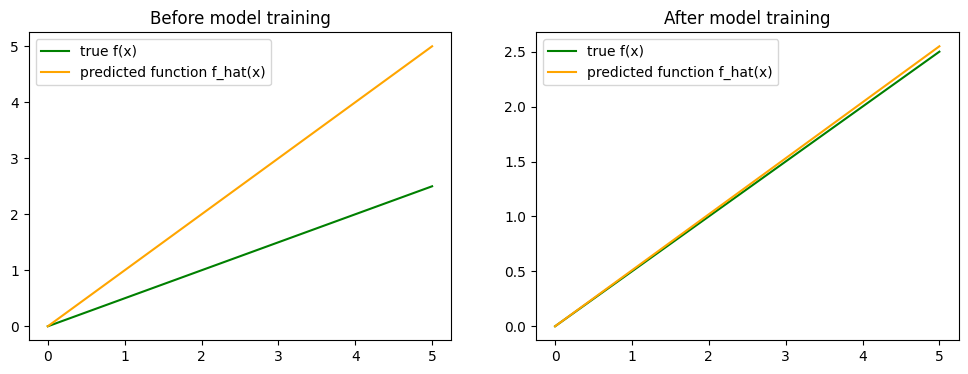

In [14]:
# Let's plot the true function and the function that is predicted by the model
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Plot true function and modelled function with old parameters
ax[0].plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax[0].plot(X, f_linear(X, initial_model_params), color="orange", label="predicted function f_hat(x)")
ax[0].set_title("Before model training")
ax[0].legend()

# Plot true function and modelled function with new parameters
ax[1].plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax[1].plot(X, f_linear(X, model_params), color="orange", label="predicted function f_hat(x)")
ax[1].set_title("After model training")
ax[1].legend()

## Your task

- Try values 0.2, 0.1, 0.05 and 0.01 for the learning rate alpha and inspect how the loss and the value of parameter a are influenced by the learning rate. Does the model find a good solution for all learning rates? Can the learning rate be too high?
- Which of the four suggested learning rates would you consider to be the optimal learning rate for the model based on your experiments?

**Answer**

0.05 is the optimal learning rate for the model. The parameter a is very close to the desired value 0.5 and the model converges fast.

0.1 also finds a good solution, but the value of the parameter a osciliates around the optimal solution

0.2 does not find the solution at all. The learning rate is too high which leads to overshooting the optimal solution and resulting in very large values for the parameter a.

A learnig rate of 0.01 is able to find the optimal values for parameter a, but in needs more time than a learning rate of 0.05. Try to run the training for 100 epochs with a learning rate of 0.01 and you will see that the value of parameter a converges to 0.5.

## Training a linear model with two parameters

Now we want to increase the complexity of our model. We add a bias **b** to our linear model. The function is now of form $y = ax + b$.

**Your task**

Complete the four functions below. All of the four functions are now a little bit different than the previous implementations, because there is the new parameter **b** which now needs to be part of these functions, too.

In [15]:
def f_linear(x, params={'a': 1, 'b': 1}):
    """
    This is a linear function of form y=ax
    :param x: Input of the model
    :param y: True y-values
    :param params: Model parameters
    """
    return params['a'] * x + params['b']

def mse_loss(x, y, params={'a': 1, 'b': 1}):
    """
    This is a MSE loss function of form L=(y-y_hat)^2=(y-ax)^2
    :param x: Input of the model
    :param y: True y-values
    :param params: Model parameters
    """
    return (y - params['a'] * x - params['b'])**2

def delta_mse_loss_a(x, y, params={'a': 1, 'b': 1}):
    """
    This is the derivative of the MSE loss function with respect to the parameter a
    :param x: Input of the model
    :param y: True y-values
    :param params: Model parameters
    """
    return 2 * (y - params['a'] * x - params['b']) * (-x)

def delta_mse_loss_b(x, y, params={'a': 1, 'b': 1}):
    """
    This is the derivative of the MSE loss function with respect to the parameter b
    :param x: Input of the model
    :param y: True y-values
    :param params: Model parameters
    """
    return 2 * (y - params['a'] * x - params['b']) * (-1)

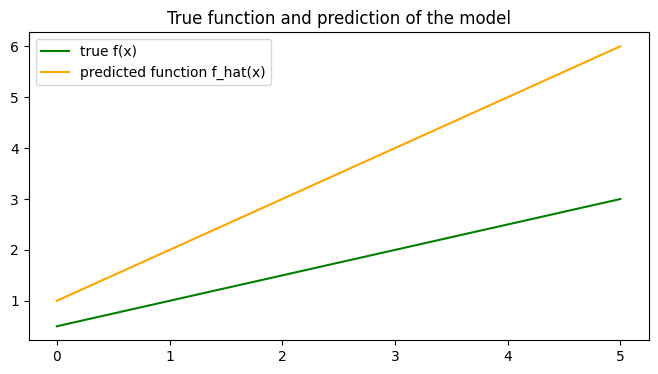

In [16]:
# First define the true and the model's parameters
true_params = {'a': 0.5, 'b': 0.5}
model_params = {'a': 1.0, 'b': 1.0}

# Let's plot the true function and the function that is predicted by the model
fig, ax = plt.subplots(1, 1, figsize=(8,4))

# Plot true function and modelled function with old parameters
ax.plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax.plot(X, f_linear(X, model_params), color="orange", label="predicted function f_hat(x)")
ax.set_title("True function and prediction of the model")
ax.legend()

We also need to update the gradient descent function. This function now needs to compute the updates for both parameters **a** and **b**.

**Your task**
Implement the `gradient_descent` function for the model with two parameters **a** and **b**

In [17]:
def gradient_descent(X, Y, old_params, alpha):
    """
    This function implements the gradient descent algorithm and returns the updated parameters
    :param X: the x-values
    :param Y: the true y-values
    :param old_params: The old model parameters
    :param alpha: The learning rate
    """
    params = {
        'a': old_params['a'] - alpha * delta_mse_loss_a(X, Y, old_params).mean(),
        'b': old_params['b'] - alpha * delta_mse_loss_b(X, Y, old_params).mean(),
    }
    return params

## Model training

Now let's train our new model. **Your task** is to implement the missing parts of the training loop.

In [18]:
epochs = 25
alpha = 0.05

# These are the true funciton parameters
true_params = {'a': 0.5, 'b': 0.5}

# These are the parameters of our model
initial_model_params = {'a': 1.0, 'b': 1.0}
model_params = {'a': 1.0, 'b': 1.0}

# History of the parameters
history = []

# The true y-values do not change, we only have to compute them once
Y = f_linear(X, true_params)

# Train the model for multiple epochs
for epoch in range(epochs):
    # First run the x-values through our model to get the predictions
    Y_hat = f_linear(X, model_params)

    # Compute the MSE loss for the model's output
    loss = mse_loss(X, Y, model_params).mean()

    # Update the model parameters by performing the gradient descent step
    model_params = gradient_descent(X, Y, old_params=model_params, alpha=alpha)

    # Update history
    history.append({'loss': loss, 'param_a': model_params['a'], 'param_b': model_params['b']})

    # Print some training information to the console
    print(f"Epoch {epoch}: loss={loss}, model_params={model_params}")

Epoch 0: loss=3.5938552188552193, model_params={'a': 0.4562289562289562, 'b': 0.825}
Epoch 1: loss=0.05054355851382652, model_params={'a': 0.4116390476028523, 'b': 0.8034427609427609}
Epoch 2: loss=0.023407473429209152, model_params={'a': 0.40978437389507616, 'b': 0.7951887229477718}
Epoch 3: loss=0.02214957604768532, model_params={'a': 0.4115465769749676, 'b': 0.7882237571792255}
Epoch 4: loss=0.021130404912576353, model_params={'a': 0.4135741022507902, 'b': 0.781514737217561}
Epoch 5: loss=0.020159396344019993, model_params={'a': 0.41558074476497214, 'b': 0.7749697379331074}
Epoch 6: loss=0.01923301798274981, model_params={'a': 0.4175429895399888, 'b': 0.7685775779485536}
Epoch 7: loss=0.0183492092615661, model_params={'a': 0.41945981172600794, 'b': 0.762334072768701}
Epoch 8: loss=0.017506013920248257, model_params={'a': 0.42133209095186475, 'b': 0.756235712560329}
Epoch 9: loss=0.016701565664625117, model_params={'a': 0.4231608475785288, 'b': 0.7502791185663299}
Epoch 10: loss=0.01

Text(0, 0.5, 'Parameter b')

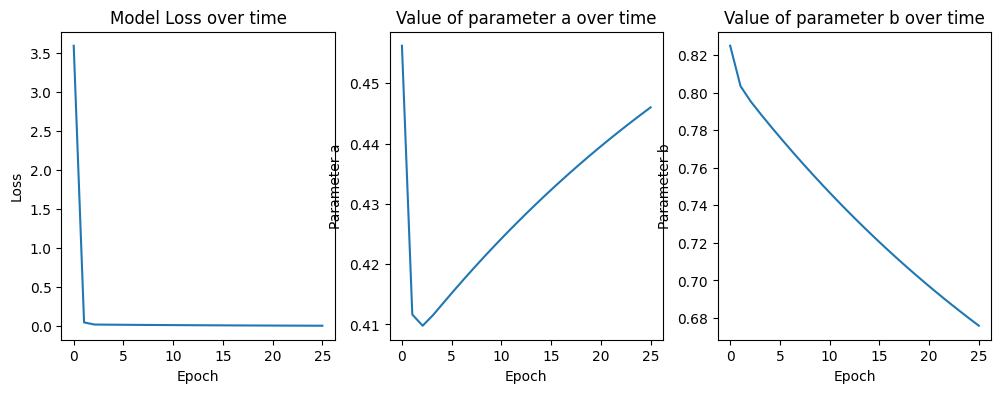

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
# Plot the loss over time
ax[0].plot(np.linspace(0, epochs, epochs), np.array(list(map(lambda x: x['loss'], history))))
ax[0].set_title("Model Loss over time")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
# Plot the value of the parameter a over time
ax[1].plot(np.linspace(0, epochs, epochs), np.array(list(map(lambda x: x['param_a'], history))))
ax[1].set_title("Value of parameter a over time")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Parameter a")
# Plot the value of the parameter b over time
ax[2].plot(np.linspace(0, epochs, epochs), np.array(list(map(lambda x: x['param_b'], history))))
ax[2].set_title("Value of parameter b over time")
ax[2].set_xlabel("Epoch")
ax[2].set_ylabel("Parameter b")

## Plot the result of the model training

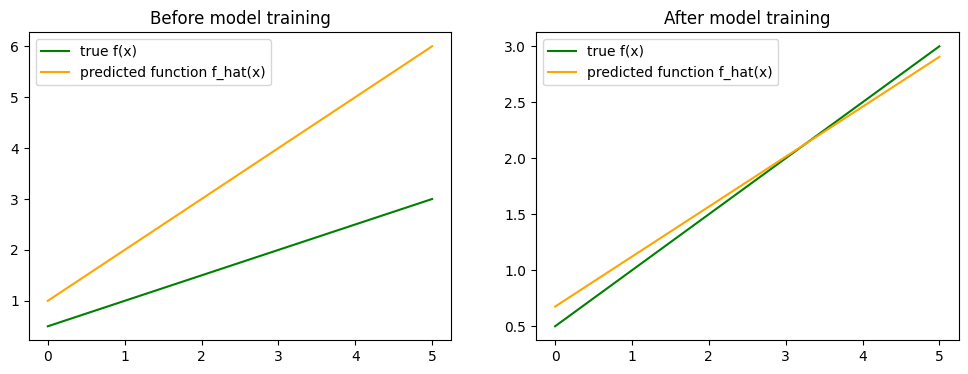

In [20]:
# Let's plot the true function and the function that is predicted by the model
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Plot true function and modelled function with old parameters
ax[0].plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax[0].plot(X, f_linear(X, initial_model_params), color="orange", label="predicted function f_hat(x)")
ax[0].set_title("Before model training")
ax[0].legend()

# Plot true function and modelled function with new parameters
ax[1].plot(X, f_linear(X, true_params), color="green", label="true f(x)")
ax[1].plot(X, f_linear(X, model_params), color="orange", label="predicted function f_hat(x)")
ax[1].set_title("After model training")
ax[1].legend()

## Your task

- Again try values 0.2, 0.1, 0.05 and 0.01 for the learning rate alpha and inspect how the loss and the value of parameter a are influenced by the learning rate. 
- Which of the four suggested learning rates would you consider to be the optimal learning rate for the model based on your experiments?
- Try to increase the number of epochs to 100 and see if the result improves
- Do you think it is possible to find the exact solution with gradient descent?

# Better way: Closed form solution

Do we need an algorithm like gradient descent for finding the optimal parameters of a linear model? No, there is a closed form solution for this task. We need to do the following things for computing the optimal solution for a linear model.

1. Build the system matrix $X$, which has the x-values in its first column and ones in its second column
2. Compute the following equation for finding the optimal parameters: $p = (X^t * X)^{-1} * (X^t * Y)$
3. The resulting vector $p$ has two components. The first component is the optimal value for our parameter $a$, the second components is the optimal parameter for the parameter $b$.

$X^t$ is the transposed matrix, which means that we just swap rows and columns. In NumPy we can get the transposed matrix by adding `.t` to a matrix variable. If a matrix is of shape $n \times m$ then its transposed matrix is of shape $m \times n$.

$X^{-1}$ is the inverted matrix. A matrix multiplied with its inverted matrix results by definition in the unit matrix $I$. In NumPy we can get the inverted matrix with the function `np.linalg.inv()`.

You can read more about solving linear equations in matrix form in this article: https://towardsdatascience.com/the-matrix-algebra-of-linear-regression-6fb433f522d5

In [21]:
Xm = X.reshape(-1, 1)
Xm = np.concatenate([Xm, np.ones((Xm.shape[0], 1))], axis=1)
Ym = Y.reshape(-1, 1)

This is how our system matrix looks like. Let's display the first five rows of the matrix

In [22]:
Xm[0:5, :]

array([[0.        , 1.        ],
       [0.05050505, 1.        ],
       [0.1010101 , 1.        ],
       [0.15151515, 1.        ],
       [0.2020202 , 1.        ]])

And this is how the Y matrix looks like. Also let's display the first five columns of Y:

In [23]:
Ym[0:5, :]

array([[0.5       ],
       [0.52525253],
       [0.55050505],
       [0.57575758],
       [0.6010101 ]])

Finally let's compute the vector $p$ with the given formula.

In [24]:
params = np.linalg.inv(Xm.T @ Xm) @ (Xm.T @ Ym)
print("Optimal params - a:", params[0], ", b:", params[1])

Optimal params - a: [0.5] , b: [0.5]


You see that it is possible to compute the optimal parameters of a linear model without gradient descent. But why did we use gradient descent in this notebook? The reason is that a linear model is very simple and it is well suited for demonstrating how gradient descent works. But when do we need gradient descent then? Basically for all non-linear functions we need gradient descent to find good parameters. There are no known closed-form solutions for nearly all non-linear functions.